# The Iowa Gambling Task

Imagine you are presented with four virtual decks of cards. You are told that each time you choose a card from a deck, you will either win or lose some money. The goal is to win as much money as possible.

This is the basis of the Iowa Gambling Task. Some decks will win money in the long term, on average, while some will lose money in the long term, on average.

This experiment was introduced by Bechara et al. in 1994, and was as initially used to test to see if certain brain dysfunctions affected the card choice, though we will use it to generally model decision making and learning. 

This tutorial will teach you to create a model of this task in Python. The learning method we will use is called 'reinforcement learning', a learning method where the system uses rewards to determine the best decision to make, or in this case, the best deck to draw a card from.

We will be basing this tutorial on an experiment done by Bull et al., 2015, which conducted a version of the Iowa Gambling task.

This is an image of what the Iowa Gambling Task looks like, and how participants interact with it, taken from the paper.

As you can see, there are four virtual decks. Deck C has been chosen, and the participant receives $50 from that choice.

<img src="IGT.png" width="800" height="800">

### Jupyter Notebook Summary

This tutorial has been produced using Jupyter Notebook. You will see sections of text, accompanied by sections of code. To run the code, click on it, hold shift, and press enter.

## Building the Model

### The Code

#### Building the Decks

Let's begin writing the code. We will first write the code to set up the decks. The code used in this tutorial has been based on Farris, 2016, though it has been heavily adapted and rewritten in order to suit this tutorial.

Each section in the tutorial will begin with a block of code, followed by a line by line explanation of the code. The code most likely won't make much sense before reading the explanations.

In [3]:
import numpy as np
import random


class Iowa:
    def __init__(self):

        self.deck_values = [0, 1, 2, 3]

        random.shuffle(self.deck_values)  # randomise deck order

        self.num_draws = [0, 0, 0, 0]  # set up list for tracking number of draws
        self.est_values = [0, 0, 0, 0]  # set up list for tracking estimated values
        
        print "Randomised order of the decks: ", self.deck_values, '\n';

experiment_instance = Iowa()

Randomised order of the decks:  [3, 1, 0, 2] 



This initial function sets up the decks, and randomises the order. A function is some code that performs a certain task. 

Run the code above a few times and see the results. This is the order of the four decks, generated randomly each time.

The first line of code:

    import numpy as np
    
allows us to use the Python library 'numpy' by calling 'np'. Libraries contain many useful functions. In our case, numpy contains mathematical functions that we will be using.

    import random

similarly imports the 'random' library.

Next, a class is created. Classes hold functions that we will create. We have named our class 'Iowa'.

An initial '\__init\__' function has been created. This is used to set up the experiment initially.

'\__init\__' functions are special within Python. When we want to use this class to run an experiment, we need to make an 'instance' of the class. Whenever we make an instance, the '\__init\__ function is automatically run.

A good analogy would be this:

A class contains some sort of structure. A 'dog' class for example, could contain 'legs', 'eyes', etc.

An instance of this dog class would a specific creation. You can have as many instances as possible. An example of an instance could be 'James' or 'Dolly', it would be a specific dog.

A good guide to classes, instances, and self, by Hamrick, 2011, is linked in the references section at the bottom.

    self.deck_values = [0, 1, 2, 3]

'self' refers to this particular instance. It means this particular instance will have this 'deck_values' list.

A list is a data structure that holds elements (items), similar to arrays in other languages. This line sets up a list, with elements 0, 1, 2, 3. These are the the deck numbers which we will refer to as the 'base decks'. Like many other languages, Python begins counting at 0.

I would highly recommend reading the TutorialPoint introduction to lists, linked in the references section at the bottom for further information.

    random.shuffle(self.deck_values)
    
This calls the 'shuffle' function from the 'random' library. This shuffles the elements in the list, randomising the order of the decks.

    self.num_draws = [0, 0, 0, 0]

This line of code sets up a list of four numbers, all set to zero to start. We will use this to keep track of how many times each deck has been drawn from.

    self.est_values = [0, 0, 0, 0]

This sets up another list of four numbers, with all set to zero to start again. We will use this to keep track of what we estimate the return of each deck to be.

Take another look at the code, and run it a few times to make sure you understand what is happening.

#### Calculating the reward

We will now write a function to calculate the reward after drawing from a deck. The code may look a little intimidating but we'll walk through it line by line.

In [8]:
import numpy as np
import random


class Iowa:
    
    from code import __init__
    
    def calc_reward(self, deck_to_draw):
        
        deck_number = self.deck_values[deck_to_draw]  # the deck number to draw from

        good = 0  # if the deck is good or bad
        
        rand_num = random.random()  # random float between 0.0 and 1.0

        if deck_number == 0:  # average over 10 draws, -250

            good = -1  # bad deck

            if rand_num < 0.5:
                reward = -150
            else:
                reward = 100

        elif deck_number == 1:  # average over 10 draws, -250

            good = -1  # bad deck

            if rand_num < 0.1:
                reward = -700
            else:
                reward = 50

        elif deck_number == 2:  # average over 10 draws, +200

            good = 1  # good deck

            if rand_num < 0.5:
                reward = -35
            else:
                reward = 75

        elif deck_number == 3:  # average over 10 draws, +250

            good = 1  # good deck

            if rand_num < 0.1:
                reward = -200
            else:
                reward = 50
        
        print "Reward: ", reward
        print "Good:", good, '\n';
        return reward, good

experiment_instance = Iowa()  

print 'Deck 0:'
experiment_instance.calc_reward(0)

print 'Deck 1:'
experiment_instance.calc_reward(1)

print 'Deck 2:'
experiment_instance.calc_reward(2)

print 'Deck 3:'
experiment_instance.calc_reward(3)

Deck 0:
Reward:  -35
Good: 1 

Deck 1:
Reward:  50
Good: -1 

Deck 2:
Reward:  -150
Good: -1 

Deck 3:
Reward:  50
Good: 1 



(50, 1)

    from code import __init__

We've added this to our code. We have a seperate file, 'code.py', that contains all the functions we will write. We wrote '\__init\__' in the previous section. To save space, we can replace the entire '\__init\__' with 'from code import \__init\__', which takes '\__init\__' from code.py and puts it where the import line is.

We will be adding more functions to this line throughout the tutorial. Functions can be added by separating them with a comma.

As you can see, we've now added the 'calc_reward' function to our code. Let's walk through it.

    def calc_reward(self, deck_to_draw):

This function has two parameters (something you must give the function for it to run).

The first parameter is 'self'. This is so the functions knows what instance to compute things on. All our functions in this class will need 'self'.

The other parameter is the deck number from which to draw a card.

    deck_number = self.deck_values[deck_to_draw]
    
This line of code gets the base deck number from the deck_to_draw input parameter, and calls it 'deck_number'. We use the deck_number to 'access' the 'base deck'.

For example, if the base decks are randomised in the order [2, 0, 3, 1]:

    self.deck_values[0]
    
would return 2, as 2 is in position 0 in the list. 0 will be the number used to access the base deck 2.

    self.deck_values[3]
    
would return 1, as 1 is in position 3 in the list.

As specified above, we will call the randomised deck numbers the 'base decks'. We will call the numbers used to access them as decks zero through three. With the randomised order above, deck 1 will refer to base deck 2. Deck 1 will refer to base deck 0. Deck 2 will refer to base deck 3. Deck 3 will refer to base deck 1.

    good = 0

This is an integer that we will use to return if the deck chosen is a 'good' deck, that will win money over time, or a 'bad' deck, that will lose money over time. We will return +1 for 'good' decks, and -1 for 'bad' decks.

    rand_num = random.random()
    
This calls the 'random' function from the 'random' library. This generates a random float (a decimal number, non integer) between 0.0 and 1.0 which we will use to decide rewards later.

    if deck_number == 0:

        good = -1 
        
        if rand_num < 0.5:
            reward = -150
        else:
            reward = 100
            
Let's walk through this line by line.

An 'if' statement means that if the given condition is met, we run the following code that is indented.
With our code, if the deck we have picked has a deck number of 0 (== means 'is equivalent to'), we enter this 'if' statement. 

We set good to -1 as we will make it a 'bad' deck, with a net loss over time.

We then use our random number. If the random number is less than 0.5, we set reward to -150. Otherwise, we set reward to +100. This gives a 50% chance of losing 150, and a 50% chance of winning 100. On average, over 10 draws, this deck will lose 250.

We use similar statements for the other three decks. 'elif' stands for 'else if'. If the previous 'if' statement was not satisfied, the condition is checked against this statement. If it satisfies it, we enter this statement.

The decks correspond to the decks used by Bull et al., 2015, copying Bechara et al., 1994:

Decks 0 and 1 have a net loss of \$250 over 10 plays. Deck 2 and 3 have a net gain of \$200 and \$250 respectively over 10 plays. Decks 0 and 2 have frequent, but small loses. Decks 1 and 3 have infrequent but large losses.

    return reward, good

We return two things: the reward, and if the deck is 'good' or 'bad' to wherever called this function.

Running the code will generate the decks, shuffle them, and draw a card from each deck.

#### Choosing Which Deck to Draw From

Before starting this section of code, we need to understand the algorithm used to choose the deck to draw from each time, called 'epsilon-greedy'.


Each time the algorithm faces a choice of which deck to choose, it must decide whether to draw from the one it currently thinks is best, called exploitation, or draw from a different one in order to test if it might be better, called exploration.


The epsilon value is the parameter we change. This changes that the amount the algorithm chooses to exploit vs explore. The epsilon value is the chance the algorithm chooses to explore rather than exploit, i.e. the chance it chooses another random cdeck.


For example, choosing an epsilon value of 0.0 means that it never chooses to explore, it will always just choose the deck that it thinks is best, while an epsilon value of 1.0 means it will always randomly choose a deck that is not the best.

Let's take a look at the code, and see how it works in practice.

In [ ]:
import numpy as np
import random


class Iowa:

    from code import __init__, calc_reward

    # choose which deck to draw from
    def choose_eps_greedy(self, epsilon):  

        # generate a random float between 0.0 and 1.0
        rand_num = random.random()  

        # get best deck
        best_deck = np.argmax(self.est_values)

        # if the random number is higher than epsilon, exploit
        if rand_num > epsilon:  
            print "Exploit: ", best_deck

            return best_deck  

        # if random number is lower than epsilon, explore
        else:
            random_deck = random.choice(self.deck_values)

            # make sure random deck chosen is not best deck
            while random_deck == best_deck:
                random_deck = random.choice(self.deck_values)

            print "Explore: ", random_deck
            return random_deck 
        
experiment_instance = Iowa()  
experiment_instance.choose_eps_greedy(0.25)

Let's break this down.

    def choose_eps_greedy(self, epsilon)

The function takes in epsilon as a parameter, so it can choose the amount it exploits vs explores. Epsilon is a float between 0.0 and 1.0. 

    rand_num = random.random()

This generates a random float between 0.0 and 1.0, like we used in the previous function.

    best_deck = np.argmax(self.est_values)
    
The argmax function is called from the numpy library. It returns the index of the highest value in the list of est_values.

est_values contains the estimated values of each of the decks (as discussed above).

Therefore, the current best deck is returned.

For example, if the est_values list is [0, -100, 50, 100], 3 will be returned. 100 is the highest value, and 3 is the index at which it is located.

    if rand_num > epsilon:
        return best_deck
        
If the random number is higher than the random number generated, exploit by choosing the deck that is currently thought to be best.

    else:
        random_deck = random.choice(self.deck_values)

        while random_deck == best_deck:
            random_deck = random.choice(self.deck_values)

        return random_deck

If the random number is not higher than epsilon, explore by randomly choosing a deck to draw from. For example, if epsilon is 0.2, then there will be a 20% chance of exploring.

    random_deck = random.choice(self.deck_values)
    
This randomly chooses a deck from the possible decks.

    while random_deck == best_deck:
        random_deck = random.choice(self.deck_values)
            
If the random deck is the same as the best deck, we enter this while loop. We keep choosing a new random deck until it is not the same as the best deck. This prevents the best deck being chosen when we are exploring.

    return random_deck
    
We return this random deck.

#### Updating the Estimates

After each time we draw a card, we need to update the estimates for what we think the deck value (expected return) is. We do this by calculating an average of every card drawn from that deck.

In [ ]:
import numpy as np
import random


class Iowa:
    
    from code import __init__, calc_reward, choose_eps_greedy

    def update_est(self, deck_to_draw, reward):
        
        # increase number of deck draws by one
        self.num_draws[deck_to_draw] += 1  
        
        # calculate the step-size
        alpha = 1./self.num_draws[deck_to_draw] 
        
        # running average of rewards
        self.est_values[deck_to_draw] += alpha * (reward - self.est_values[deck_to_draw])  
        print "Updated average: ", self.est_values[deck_to_draw]
        
experiment_instance = Iowa()  
experiment_instance.update_est(0, 100)
experiment_instance.update_est(0, -150)
experiment_instance.update_est(0, -150)
experiment_instance.update_est(0, 100)

Let's see how this works.

    def update_est(self, deck_to_draw, reward)
    
The function takes in the deck number we drew from, and the reward received as parameters.

    self.num_draws[deck_to_draw] += 1

num_draws is the list storing the number of times each deck has been drawn from. We increment the value stored at the index corresponding to the deck that was drawn from after each draw. The above line is the same as:
    
    self.num_draws[deck_to_draw] = self.num_draws[deck_to_draw] + 1

For example, if a card is drawn from deck 0, self.num_draws[0] will be incremented by one, i.e. if the num_draws list was [12, 32, 25, 29], the list would become [13, 32, 25, 29].

    alpha = 1./self.num_draws[deck_to_draw]

This calculates the step-size, something we use in the next step. It is calculated using: 1/(number of draws from that deck).

    self.est_values[deck_to_draw] += alpha * (reward - self.est_values[deck_to_draw]) 

This updates the average reward from the deck that was drawn from. It is an incremental way of calculating (total reward from deck)/(number of draws from deck), which is the average. The actual algorithm itself is not important, and there are lots of algorithms that do the same thing, but make sure to understand what it calculates.

As an exercise, you could try implementing a different algorithm.

Running the above code will calculate the estimates if the first four rewards drawn from deck 0 were: 100, -150, -150, 100.

#### Running an Experiment

We now have all the code we need to run experiments, and we can finish off the class. This section of code is not runnable, we'll go through how to run it in the following section.

Like the experiment conducted by Bull et al., 2015, we will be displaying our results in 20 draw blocks. In summary, we will count the number of 'good' draws minus 'bad' draws for the first 20 draws, and call that block one. We will then count the number of 'good' draws minus 'bad' draws for the next twenty blocks, and call that block two, and so on.

In [ ]:
import numpy as np
import random


class Iowa:
    
    from code import __init__, calc_reward, choose_eps_greedy, update_est
    
    def experiment(self, num_draws_wanted, epsilon, block_size):
        
        history = []
        results = []
        running_total = 0

        for n in range(num_draws_wanted):
            
            deck_to_draw = self.choose_eps_greedy(epsilon)  # choose which deck to draw from
            (reward, good_draw) = self.calc_reward(deck_to_draw)  # calculate the reward from drawing
            self.update_est(deck_to_draw, reward)  # update deck value estimates
            history.append(good_draw)  # store reward value

        for n in range(len(history)):

            if n%block_size == 0:  # if at the start of a new block
                results.append(running_total)  # append the number of net good draws to results
                running_total = 0  # reset running total to zero

            running_total += history[n]

        return results

Let's break down the final part of the class.

    def experiment(self, num_draws_wanted, epsilon, block_size):
    
The parameters are num_draws_wanted (the total number of draws wanted), epsilon (the epsilon value wanted between 0.0 and 1.0), and block_size.

Bull et al., 2015 used 200 draws per participant, split into 10 blocks of 20 draws, and calculated the net 'good' draws for each block.

    history = []

This creates an empty list that we will use to store the history of if the draw was from a 'good' or 'bad' deck.

    results = []

This creates an empty list that we will use to store the net number of good draws per block.

    running_total = 0

This is an integer we will use to keep a running total of good draws per block.

    for n in range(num_draws_wanted):
    
        deck_to_draw = experiment_instance.choose_eps_greedy(epsilon)
        (reward, good_draw) = experiment_instance.calc_reward(deck_to_draw)
        experiment_instance.update_est(deck_to_draw, reward)
        history.append(good_draw)  

We input the number of draws we want as a parameter, and we then use that in a 'for' loop. A 'for' loop will run the following code the inputed number of times, in this case, 'num_draws_wanted'.

Each loop does this:

First calculates the deck to draw from using our choose_eps_greedy function.

Next, we calculate the reward, and if the deck is 'good' or 'bad' using our calc_reward function. Remember that the function has two returns.

We then update the estimate for that deck using our update_est function.

    list0.append(list1)
    
This adds list1 to the end of list0.

We then append whether it was a 'good' or 'bad draw (+1 or -1) to the end of our history list. The history list will be a list of '-1's and '1's.

    for n in range(len(history)):

            if n%block_size == 0:
                results.append(running_total)
                running_total = 0

            running_total += history[n]

        return results
        
This code now splits our history list into blocks.

It loops through the history list.
    
    running_total += history[n]

counts the number of 'good' draws - 'bad' draws, the net 'good' draws.
    
For example, if the first five elements of the history list are [1, -1, -1, 1, -1], the running total will become (in order): 1, 0, -1, 0, -1.

If it reaches the start of a new block, it will append this total to the end of our results list, and reset that total to zero ready for the next block. It calculates if it has reached a new block using the modulo function, %. The modulo function returns the remainder when one number is divided by another. 

Using a block size of 20, as in the experiment, when it reaches the 20th element of the history list, modulo will be 0, as 20/20 is 1, remainder 0, and therefore it knows it is at the start of a new block.

If it is at the 55th element of the history list, modulo will be 15, as 55/20 is 2, remainder 15, so it knows it is not at the start of a new block.

That's it! We've finished the class. Let's talk through how to run it.

#### Getting Results

We run the experiment function to get some results.

In [ ]:
import numpy as np
import random

class Iowa:
    
    from code import __init__, calc_reward, choose_eps_greedy, update_est, experiment
    
experiment_instance = Iowa()
outcome = experiment_instance.experiment(20, 0.1, 4)  # run the experiment
print outcome

    experiment_instance = Iowa()
    outcome = experiment_instance.experiment(20, 0.1, 4) 

Running the code above draws a card 20 times, with an epsilon of 0.1, and a block size of 4. The net 'good' draws for each block are listed.

#### Running the Experiment

This is the code we will use to run the experiment. This section is not runnable as we need to add it to our main code.

In [ ]:
block_size = 20
num_runs = 50
num_draws = 200

avg_outcome_eps0p0 = np.zeros(num_draws/block_size)  # store the results of each run
avg_outcome_eps0p01 = np.zeros(num_draws/block_size)
avg_outcome_eps0p1 = np.zeros(num_draws/block_size)
avg_outcome_eps0p25 = np.zeros(num_draws/block_size)

for i in range(num_runs):

    experiment_instance = Iowa()
    avg_outcome_eps0p0 += experiment_instance.experiment(num_draws, 0.0, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p01 += experiment_instance.experiment(num_draws, 0.01, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p1 += experiment_instance.experiment(num_draws, 0.1, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p25 += experiment_instance.experiment(num_draws, 0.25, block_size)

avg_outcome_eps0p0 /= np.float(num_runs)  # average the results
avg_outcome_eps0p01 /= np.float(num_runs)
avg_outcome_eps0p1 /= np.float(num_runs)
avg_outcome_eps0p25 /= np.float(num_runs)

    block_size
    num_runs
    num_draws
These set up the block size wanted, the number of runs of the experiment wanted (i.e. the number of participants), and the number of deck draws for each run.

We have set the block size to 20, the number of runs to 50, and the number of draws to 200, to mirror the Bull et al. experiment.

    avg_outcome_eps0p0 = np.zeros(num_draws/block_size)
    avg_outcome_eps0p01 = np.zeros(num_draws/block_size)
    avg_outcome_eps0p1 = np.zeros(num_draws/block_size)
    avg_outcome_eps0p25 = np.zeros(num_draws/block_size)

These are arrays (similar to lists) to store the results of the net 'good' draws per block. The number of blocks needed is num_draws/block_size. np.zeros creates arrays of the given size and makes all the elements zero.
    
    eps0p0

reads epsilon zero point zero (0.0)

    eps0p25
    
reads epsilon zero point two five (0.25)

The epsilon values we use are 0.0, 0.01, 0.1, and 0.25. 0.0 is picked so we can see the results purely from picking what we think is the best value. The others are there to provide a wide variety of values.

    for i in range(num_runs):

        experiment_instance = Iowa()
        avg_outcome_eps0p0 += experiment_instance.experiment(num_draws, 0.0, block_size)

        experiment_instance = Iowa()
        avg_outcome_eps0p01 += experiment_instance.experiment(num_draws, 0.01, block_size)

        experiment_instance = Iowa()
        avg_outcome_eps0p1 += experiment_instance.experiment(num_draws, 0.1, block_size)

        experiment_instance = Iowa()
        avg_outcome_eps0p25 += experiment_instance.experiment(num_draws, 0.25, block_size)

This runs the experiment, for the given number of runs.

The parameters for each experiment instance are: the given number of draws, the given epsilon value, and given block size. It adds the results after each run to the end of the current avg_outcome for that experiment instance.

For example, if the current avg_outcome for a given epsilon value is [-2, 0, 2...] and the next results array for the same epsilon value is [0, 3, 5...], adding them together would result in [-2, 3, 7...].

    avg_outcome_eps0p0 /= np.float(num_runs) 
    avg_outcome_eps0p01 /= np.float(num_runs)
    avg_outcome_eps0p1 /= np.float(num_runs)
    avg_outcome_eps0p25 /= np.float(num_runs)

This averages the results. The net 'good' draws in the first block, among all the participants is averaged, the net 'good' draws in the second block, among all the participants is averaged, and so on.

So if the results array is currently [-2, 3, 7...] and the number of runs is 2, the end result will be [-1, 1.5, 3.5...]

This section can be a bit confusing so a worded explanation might help:

There are four separate experiments. One with an epsilon value of 0.0, one with an epsilon value of 0.01, one with an epsilon value of 0.1, and one with an epsilon value of 0.25.

Each experiment is where 200 cards are drawn. Each experiment is run 50 times.

The 200 card draws are split into 'blocks' of 20 draws, and the number of 'good' - 'bad' draws within each block is calculated.

#### Plotting Result Graphs

This is the code we will use to plot graphs of our results. This section of code is not runnable, as we need to add the rest of our code.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(avg_outcome_eps0p0, label="eps = 0.0")  # plot the results, and give a label
plt.plot(avg_outcome_eps0p01, label="eps = 0.01")
plt.plot(avg_outcome_eps0p1, label="eps = 0.1")
plt.plot(avg_outcome_eps0p25, label="eps = 0.25")
plt.ylim(-10, 20)  # limits for the y-axis
plt.legend(loc='best')  # display the graph key
plt.savefig('graph.png')  # save graph to folder
plt.show()  # display the graph

We firstly add
    
    import matplotlib.pyplot as plt
    
to the top of our code as we will be using this library to plot result graphs.

     plt.plot(results_to_be_plotted, label="label wanted")

This plots the results calculated above, and labels these results. We plot a graph for each epsilon value.

    plt.ylim(-10, 25)

This restricts the y-axis from -10 to 25. The maximum number of 'good' draws is 20, the block size. We use 25 to give some space at the top.

    plt.savefig('graph.png')

This saves a copy of the graph to the same folder that this notebook is stored in, as 'graph.png'.

    plt.legend(loc = 'best') 

This provides the graph with a key to associate each coloured line with the correct label, and places it where the function determines to be best.

    plt.show()

This displays the graph on screen.

#### Completed Code

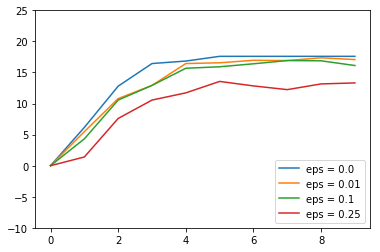

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt


class Iowa:
    def __init__(self):

        self.deck_values = [0, 1, 2, 3]

        random.shuffle(self.deck_values)  # randomise deck order

        self.num_draws = [0, 0, 0, 0]  # set up list for tracking number of draws
        self.est_values = [0, 0, 0, 0]  # set up list for tracking estimated values

    def calc_reward(self, deck_to_draw):

        deck_number = self.deck_values[deck_to_draw]  # the deck number to draw from

        good = 0  # if the deck is good or bad

        rand_num = random.random()  # random float between 0.0 and 1.0

        if deck_number == 0:  # average over 10 draws, -250

            good = -1  # bad deck

            if rand_num < 0.5:
                reward = -150
            else:
                reward = 100

        elif deck_number == 1:  # average over 10 draws, -250

            good = -1  # bad deck

            if rand_num < 0.1:
                reward = -700
            else:
                reward = 50

        elif deck_number == 2:  # average over 10 draws, +200

            good = 1  # good deck

            if rand_num < 0.5:
                reward = -35
            else:
                reward = 75

        elif deck_number == 3:  # average over 10 draws, +250

            good = 1  # good deck

            if rand_num < 0.1:
                reward = -200
            else:
                reward = 50

        return reward, good

    # choose which deck to draw from
    def choose_eps_greedy(self, epsilon):  

        # generate a random float between 0.0 and 1.0
        rand_num = random.random()  

        # get best deck
        best_deck = np.argmax(self.est_values)

        # if the random number is higher than epsilon, exploit
        if rand_num > epsilon:  
            
            return best_deck  

        # if random number is lower than epsilon, explore
        else:
            random_deck = random.choice(self.deck_values)

            # make sure random deck chosen is not best deck
            while random_deck == best_deck:
                random_deck = random.choice(self.deck_values)

            return random_deck 

    def update_est(self, deck_to_draw, reward):

        # increase number of deck draws by one
        self.num_draws[deck_to_draw] += 1  

        # calculate the step-size
        alpha = 1./self.num_draws[deck_to_draw] 

        # running average of rewards
        self.est_values[deck_to_draw] += alpha * (reward - self.est_values[deck_to_draw])  

    def experiment(self, num_draws_wanted, epsilon, block_size):

        history = []
        results = []
        running_total = 0

        for n in range(num_draws_wanted):

            deck_to_draw = self.choose_eps_greedy(epsilon)  # choose which deck to draw from
            (reward, good_draw) = self.calc_reward(deck_to_draw)  # calculate the reward from drawing
            self.update_est(deck_to_draw, reward)  # update deck value estimates
            history.append(good_draw)  # store reward value

        for n in range(len(history)):

            if n%block_size == 0:  # if at the start of a new block
                results.append(running_total)  # append the number of net good draws to results
                running_total = 0  # reset running total to zero

            running_total += history[n]

        return results

block_size = 20
num_runs = 50
num_draws = 200

avg_outcome_eps0p0 = np.zeros(num_draws/block_size)  # store the results of each run
avg_outcome_eps0p01 = np.zeros(num_draws/block_size)
avg_outcome_eps0p1 = np.zeros(num_draws/block_size)
avg_outcome_eps0p25 = np.zeros(num_draws/block_size)

for i in range(num_runs):

    experiment_instance = Iowa()
    avg_outcome_eps0p0 += experiment_instance.experiment(num_draws, 0.0, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p01 += experiment_instance.experiment(num_draws, 0.01, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p1 += experiment_instance.experiment(num_draws, 0.1, block_size)

    experiment_instance = Iowa()
    avg_outcome_eps0p25 += experiment_instance.experiment(num_draws, 0.25, block_size)

avg_outcome_eps0p0 /= np.float(num_runs)  # average the results
avg_outcome_eps0p01 /= np.float(num_runs)
avg_outcome_eps0p1 /= np.float(num_runs)
avg_outcome_eps0p25 /= np.float(num_runs)

# plot results
plt.plot(avg_outcome_eps0p0, label="eps = 0.0")  # plot the results, and give a label
plt.plot(avg_outcome_eps0p01, label="eps = 0.01")
plt.plot(avg_outcome_eps0p1, label="eps = 0.1")
plt.plot(avg_outcome_eps0p25, label="eps = 0.25")
plt.ylim(-10, 25)  # limits for the y-axis
plt.legend(loc='best')  # display the graph key
plt.savefig('graph.png')  # save graph to folder
plt.show()  # display the graph

Run the completed code to see the results.

You can also change the epsilon values, and see how that changes results.

Congratulations! You've successfully build a model of the Iowa Gambling Task!

### Analysing Results

Now that we've got the results, let's see what they mean.

Here's a graph of results for block size 20, with 50 participants, and 200 draws, as in the Bull et al. experiment. You should see results similar to this.


<img src="graph.png" width="600" height="600">

The graph shows the number of net 'good' draws in each block for each epsilon value.

As we can see, all algorithms get better over time, showing our epsilon-greedy algorithm works, but the rate at which it improves, and the value at which it plateaus changes depending on our choice of epsilon value.

Let's compare it to the results of the paper.

<img src="PaperGraph.png">

Our y-axis matches the right y-axis in the graph from the paper (the net positive draws).

The line plotted for the graph from the paper matches an epsilon value of 0.25 well. This suggests that humans make choices using a similar method to an epsilon-greedy algorithm with an epsilon value of 0.25.

While an epsilon value matches humans, it is not the best result; all the other values give faster learning rates, and a higher plateau. This becomes especially important in similar problems with more choices (more decks of cards).

Setting the epsilon value to 0.1 means that the algorithm will choose to explore 10% of the time. This allows it to explore quite quickly, while exploiting this exploration the vast majority of time. This means this algorithm improves quickly.

Setting the epsilon value to 0.01 means the algorithm will only choose to explore 1% of the time. This means it improves quite slowly at the beginning, as the algorithm needs to run quite a few times before it obtains good exploration results. However, this value beats 0.1 in the long term, as once the algorithm has explored enough and has enough information about each of the decks, it will only draw from a deck that isn't the 'best' 1% of the time, while with an epsilon value of 0.1, a deck that isn't the 'best' will be drawn from 10% of the time.

With this particular experiment, an epsilon value of 0.0, known as a 'greedy' algorithm actually performs best, as once it learns the 'best' deck, it will always pick it, and no choose any other deck. However, this would not be suitable for problems with decks that vary over time.

This all means that in larger problems, a higher epsilon value at the beginning is the best, as it allows quick exploration, while a lower epsilon value the more the algorithm runs is the best, as this allows it to exploit more often once it has established the deck values. Some algorithms implement an epsilon value that starts higher, and slowly lowers over time, taking advantage of this fact.

Try changing the epsilon values to see varying results, and as an exercise, try implementing an epsilon value that slowly decreases over time.

#### References:

Bechara, A., Damasio, A. R., Damasio, H. and Anderson, S. W. (1994), ‘Insensitivity to future consequences following damage to human prefrontal cortex’, Cognition 50(1), 7–15.

Bull, P. N., Tippett, L. J. and Addis, D. R. (2015), ‘Decision making in healthy participants on the iowa gambling task: new insights from an operant approach’, Frontiers in psychology 6, 391.

Farris, B. (2016), ‘Multi-armed bandits’, http://blog.thedataincubator.com/2016/07/multi-armed-bandits-2/. [Online; accessed 16 January 2017].

Hamrick, J. (2011), ‘An Introduction to Classes and Inheritance (in Python)’, http://www.jesshamrick.com/2011/05/18/an-introduction-to-classes-and-inheritance-in-python/. [Online; accessed 09 March 2017].

TutorialPoint. (n.d.), 'Python Lists', https://www.tutorialspoint.com/python/python_lists.htm. [Online; accessed 09 March 2017].